<a href="https://colab.research.google.com/github/raihanalmenata/ML/blob/main/food_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roadmap
1. Convolution Layer
2. Max Pooling
3. 1 Hidden Layer Consist of 100 Neurons ReLu
4. Output Layer 2 Neurons, Softmax activiton function



## Import Required Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Download The Inception V3 Weights

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-03 16:07:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   375MB/s    in 0.2s    

2022-06-03 16:07:24 (375 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [4]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

##Pre-trained Model Function

In [5]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (128, 128, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [6]:
pre_trained_model = create_pre_trained_model(local_weights_file)

#pre_trained_model.summary()

##Pipelining the pre-trained model with our own layers architecture

In [7]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [8]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 6, 6, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


## Final Food Classification Model

In [9]:
def create_final_model(pre_trained_model, last_output):
  
  # Flatten the output layer to 1 dimension
  # x = layers.Flatten()(last_output)
  # x = layers.Dense(1024, activation='relu')(x)
  # x = layers.Dropout(0.2)(x)
  # x = layers.Dense(1, activation='sigmoid')(x)

  # x = tf.keras.layers.Conv2D(24, 7, activation='relu')(last_output)
  # x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
  # x = tf.keras.layers.Conv2D(48, 5, activation='relu')(x)
  # x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
  # x = tf.keras.layers.Conv2D(72, 3, activation='relu')(x)
  # x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
  # x = tf.keras.layers.Dropout(0.25)(x)
  x = tf.keras.layers.Flatten()(last_output)
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(9, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer='RMSProp', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  
  return model

## Image Data Generator

In [10]:
def generators(TRAIN_DIR, VAL_DIR):

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  
  val_datagen = ImageDataGenerator(rescale=1./255)

  ##rotation range until fill_mode values were still placeholder

  train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                      batch_size=100,
                                                      class_mode='categorical',
                                                      target_size=(128, 128))
  
  val_generator = val_datagen.flow_from_directory(directory=VAL_DIR,
                                                  batch_size=100,
                                                  class_mode='categorical',
                                                  target_size=(128, 128))
  
  return train_generator, val_generator

In [11]:
TRAIN_DIR='/content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/STRUCTURED/RATIO : 0.8/TRAINING'
VAL_DIR='/content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/STRUCTURED/RATIO : 0.8/VALIDATION'

# Test the generators
train_generator, val_generator = generators(TRAIN_DIR, VAL_DIR)

Found 9622 images belonging to 9 classes.
Found 2396 images belonging to 9 classes.


## Train Model

In [12]:
model = create_final_model(pre_trained_model, last_output)
history = model.fit(train_generator, epochs=25, verbose=1, validation_data=val_generator)

Epoch 1/25
97/97 [==============================] - 2613s 27s/step - loss: 2.2987 - accuracy: 0.5207 - val_loss: 0.7032 - val_accuracy: 0.7629
Epoch 2/25
97/97 [==============================] - 219s 2s/step - loss: 1.0301 - accuracy: 0.6594 - val_loss: 0.6648 - val_accuracy: 0.7775
Epoch 3/25
97/97 [==============================] - 208s 2s/step - loss: 0.9066 - accuracy: 0.7018 - val_loss: 0.5560 - val_accuracy: 0.8030
Epoch 4/25
97/97 [==============================] - 206s 2s/step - loss: 0.8421 - accuracy: 0.7222 - val_loss: 0.6062 - val_accuracy: 0.7992
Epoch 5/25
97/97 [==============================] - 210s 2s/step - loss: 0.8294 - accuracy: 0.7289 - val_loss: 0.5239 - val_accuracy: 0.8326
Epoch 6/25
97/97 [==============================] - 206s 2s/step - loss: 0.8044 - accuracy: 0.7413 - val_loss: 0.4834 - val_accuracy: 0.8402
Epoch 7/25
97/97 [==============================] - 206s 2s/step - loss: 0.7844 - accuracy: 0.7445 - val_loss: 0.5029 - val_accuracy: 0.8306
Epoch 8/25


## Visualization

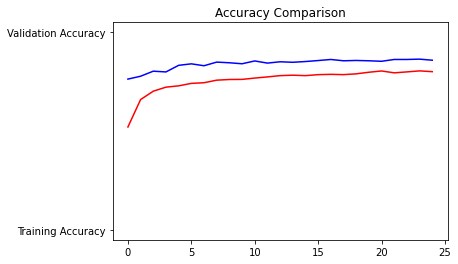

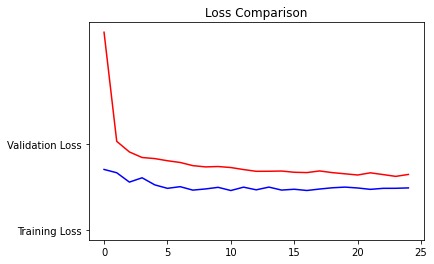

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Accuracy Comparison')
plt.show()
print('')


plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Loss Comparison')
plt.show()

## Missing Part

- Image Pre-processing process.
- Train operation

In [14]:
model.save('./my_model')
model.save_weights('./my_weights')

model.save('/content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/my_model')
model.save_weights('/content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/my_weights')

INFO:tensorflow:Assets written to: ./my_model/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/my_model/assets


# Food Classification Model

Below is the code written to build the baseline version of the food classification model. 
The model is desgined to fulfill the minimum criteria of the model by implementing minimum configuration. The model then expected to represent the possible accuracy of the model with the estimated available dataset.

In [ ]:
def model():
  # The input is assumed to be 128x128 RGB Image
  model = tf.keras.models.Sequential(
      [tf.keras.layers.Conv2D(24, 7, activation='relu', input_shape=(128,128,3)), 
       tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
       tf.keras.layers.Conv2D(48, 5, activation='relu'),
       tf.keras.layers.MaxPool2D(pool_size=(2,2)),
       tf.keras.layers.Conv2D(72, 3, activation='relu'),
       tf.keras.layers.MaxPool2D(pool_size=(2,2)),
       tf.keras.layers.Dropout(0.25),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(4, activation='softmax')]) # The output label is configured to be 10

  model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  return model